In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from face_data import load_faces

load the classifier

In [2]:
import neuralnet
neuralnet = reload(neuralnet)
from neuralnet import FeatureClassifier

model = FeatureClassifier()

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000


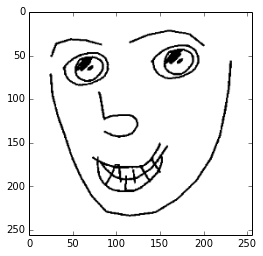

In [3]:
im = cv2.imread('faces/face_85.png', 0)
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

**Method 1: sliding window**
- slide a small window across the image
- for each window, convert to 3-stroke format
- classify as a eye, nose, mouth

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 0.91039264


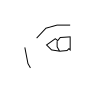

eye 0.7811077


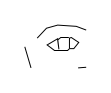

eye 0.46206826


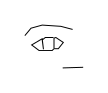

mouth 2.611649


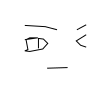

nose 1.9101399


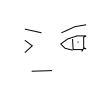

nose 1.7806386


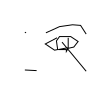

nose 1.2974707


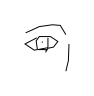

nose 0.8515307


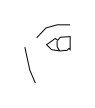

mouth 0.44541594


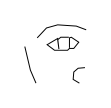

eye 1.7987318


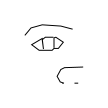

mouth 2.6134646


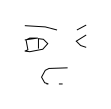

nose 1.995454


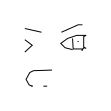

nose 1.888214


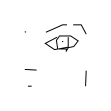

nose 0.7327974


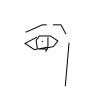

nose 4.52968


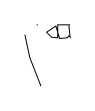

mouth 2.205942


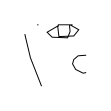

nose 2.2829905


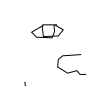

nose 1.6571399


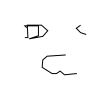

nose 2.9865842


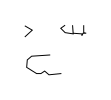

nose 1.5359329


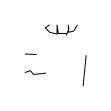

nose 2.2000709


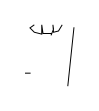

nose 6.2284102


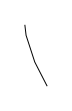

nose 7.209126


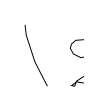

nose 2.1410632


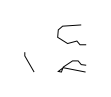

nose 2.4978151


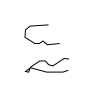

nose 3.5656252


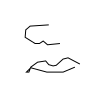

mouth 2.7442799


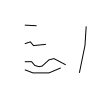

nose 7.0613537


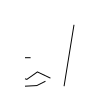

nose 7.487625


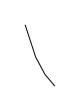

nose 7.16595


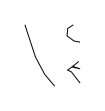

nose 3.7296448


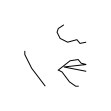

mouth 2.0386872


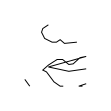

mouth 3.9050617


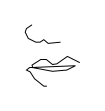

mouth 4.9346743


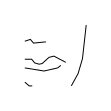

nose 7.4593234


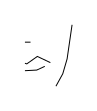

nose 5.0815563


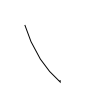

nose 5.4367375


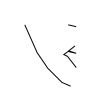

nose 3.8753653


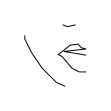

mouth 5.957729


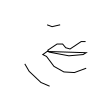

mouth 3.6303875


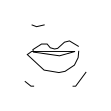

mouth 2.9552777


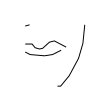

nose 6.097567


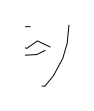

nose 4.2174797


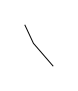

nose 6.5310597


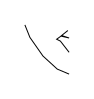

nose 4.947892


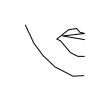

mouth 4.8583755


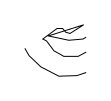

mouth 5.654743


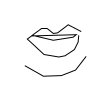

mouth 5.4663024


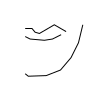

nose 3.0956178


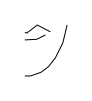

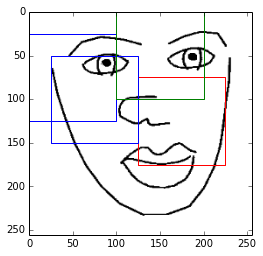

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 1.8083152


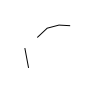

eye 3.0749464


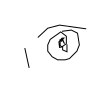

eye 3.8167038


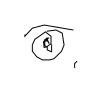

eye 1.3550234


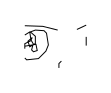

nose 4.82004


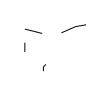

nose 6.048976


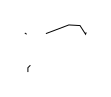

nose 1.1381139


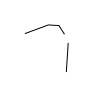

nose 3.5075774


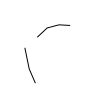

None 1.998868


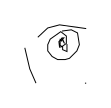

no classification
eye 3.5996113


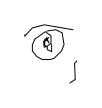

eye 1.3576896


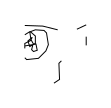

nose 4.3915257


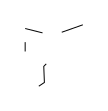

nose 4.0294433


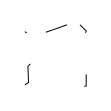

nose 2.0437274


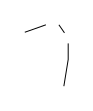

nose 0.6583402


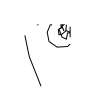

mouth 1.3617157


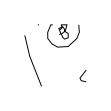

mouth 1.5185115


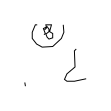

mouth 1.7114495


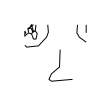

mouth 1.7650075


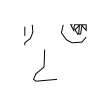

nose 1.7628106


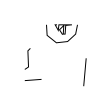

mouth 3.4319198


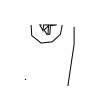

nose 9.636528


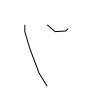

nose 4.241472


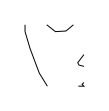

nose 3.3662214


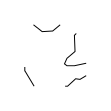

nose 4.473801


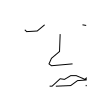

nose 3.4981036


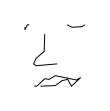

nose 4.9854283


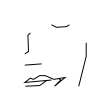

nose 4.1556354


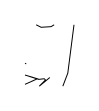

nose 7.460565


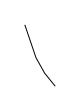

nose 7.565506


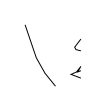

nose 2.138442


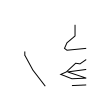

mouth 6.478424


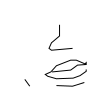

mouth 6.5063143


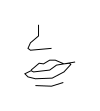

nose 2.1127772


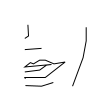

nose 2.2460213


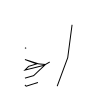

nose 9.301834


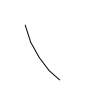

nose 5.8701396


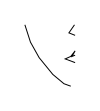

nose 4.1141357


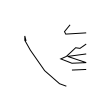

mouth 5.3943105


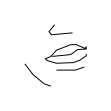

mouth 5.525449


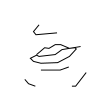

mouth 1.5665655


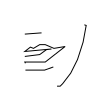

nose 2.3080401


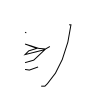

nose 4.279788


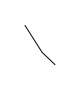

nose 7.4343324


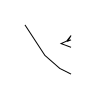

nose 5.3845186


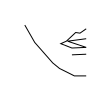

mouth 4.207789


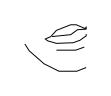

mouth 6.4022336


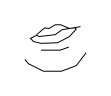

mouth 3.7939684


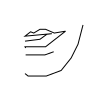

nose 3.294695


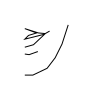

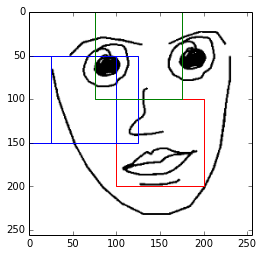

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 2.8079314


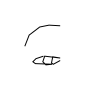

nose 2.2758708


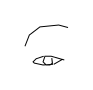

eye 0.7918108


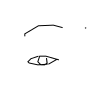

nose 1.7701229


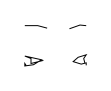

nose 2.0209465


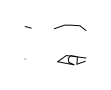

nose 1.1324003


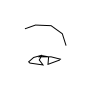

nose 1.2342137


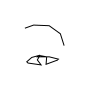

nose 2.2555223


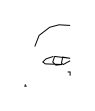

nose 1.4767798


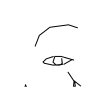

eye 3.7301931


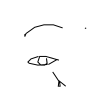

nose 1.7035017


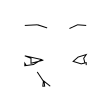

nose 3.34833


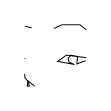

nose 1.0560389


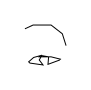

nose 0.6325549


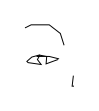

nose 2.1849895


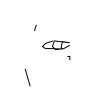

mouth 0.65312207


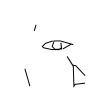

eye 1.9825642


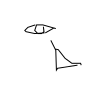

mouth 3.0677903


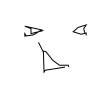

nose 5.1990485


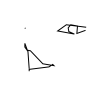

mouth 1.9494053


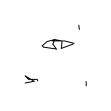

mouth 2.55548


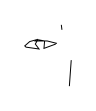

mouth 1.6021763


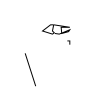

mouth 1.7749461


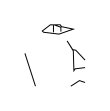

mouth 4.7468586


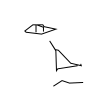

mouth 5.4555893


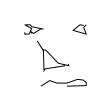

nose 2.9141235


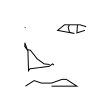

mouth 1.5224448


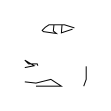

nose 5.6242805


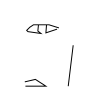

nose 7.3609447


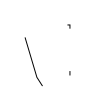

nose 3.862598


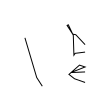

nose 3.238718


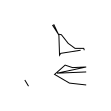

mouth 4.626226


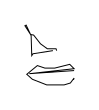

mouth 2.6683388


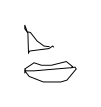

mouth 0.7120241


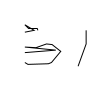

nose 4.829839


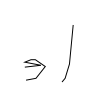

nose 9.033138


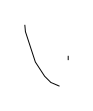

nose 3.2339702


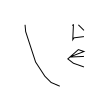

mouth 3.6232998


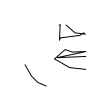

mouth 5.4937725


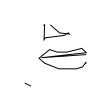

mouth 7.606862


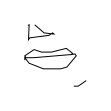

mouth 2.3144035


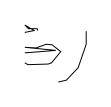

nose 3.5528688


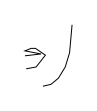

nose 9.192674


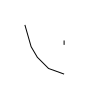

nose 8.024394


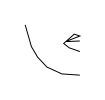

nose 2.3885593


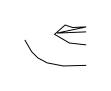

mouth 3.6675029


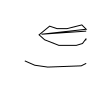

mouth 5.299953


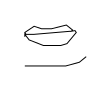

mouth 3.9272509


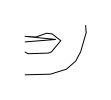

nose 1.9636258


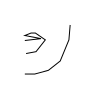

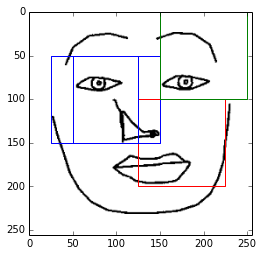

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 5.0084515


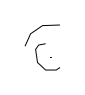

nose 0.7192534


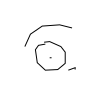

mouth 1.2745653


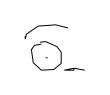

nose 3.4513707


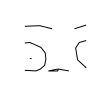

nose 2.9429789


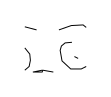

nose 3.507938


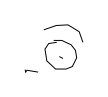

nose 1.7965659


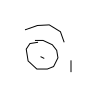

nose 3.207559


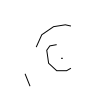

mouth 2.3799443


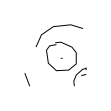

mouth 1.1600275


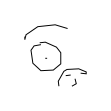

nose 3.6910143


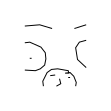

nose 5.925245


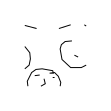

nose 3.1709814


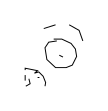

nose 4.2006097


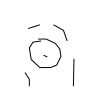

nose 4.3642864


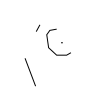

mouth 1.5537997


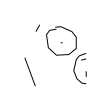

nose 1.5124235


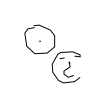

nose 3.400661


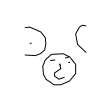

nose 2.7369351


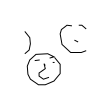

nose 1.3479071


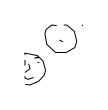

nose 2.223946


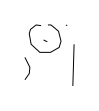

nose 2.728466


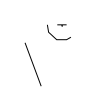

mouth 2.0845454


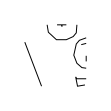

mouth 2.5687742


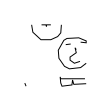

mouth 5.3974967


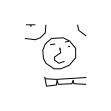

mouth 7.049049


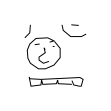

mouth 0.9667667


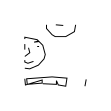

nose 6.4835505


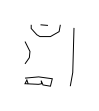

nose 6.913435


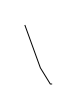

nose 4.959797


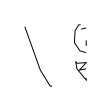

nose 4.1371284


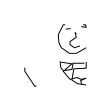

mouth 6.7596216


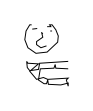

mouth 9.566499


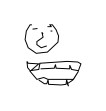

mouth 3.949133


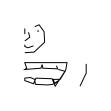

nose 10.561351


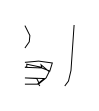

nose 9.34552


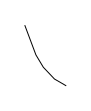

nose 4.350287


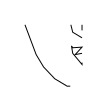

mouth 2.7418008


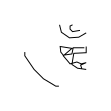

mouth 5.8182073


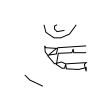

mouth 6.198519


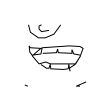

mouth 6.9370837


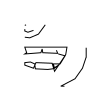

nose 8.913547


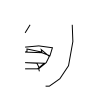

nose 9.215873


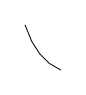

nose 5.94899


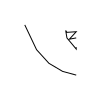

nose 1.9708422


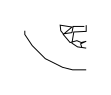

mouth 1.7593135


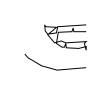

mouth 7.798


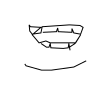

mouth 7.452071


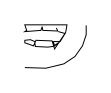

mouth 6.3544526


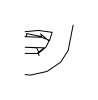

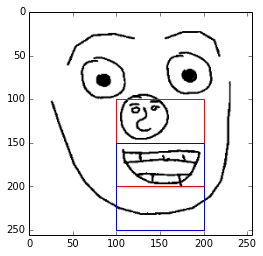

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
eye 1.221745


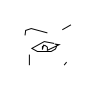

eye 1.7852938


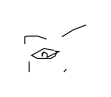

nose 4.82698


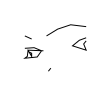

eye 5.591617


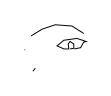

eye 2.040875


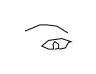

nose 2.368907


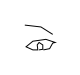

nose 6.1055446


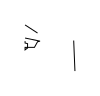

nose 0.5545628


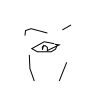

None 1.6016368


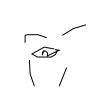

no classification
nose 4.509324


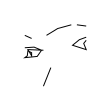

None -0.27530375


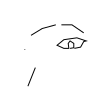

no classification
mouth 1.1162602


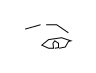

mouth 0.66157746


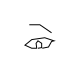

nose 0.9916806


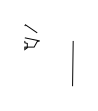

nose 4.35306


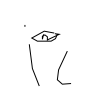

nose 4.3160043


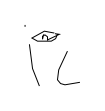

nose 1.0232606


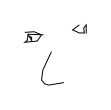

nose 4.2983203


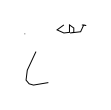

nose 4.09873


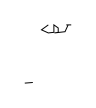

nose 3.9958158


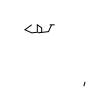

nose 8.8983965


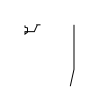

nose 3.3963299


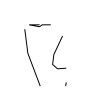

nose 4.4038506


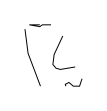

nose 1.6359019


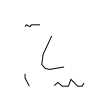

nose 8.498766


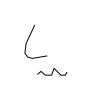

nose 7.459305


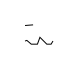

nose 7.407107


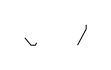

nose 4.3483133


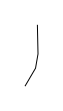

nose 7.788447


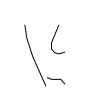

nose 7.40563


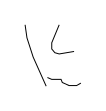

mouth 5.80235


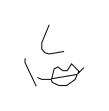

mouth 7.690679


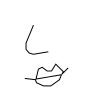

nose 3.2808223


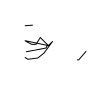

nose 4.423058


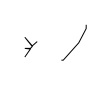

nose 4.593277


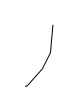

nose 6.2096534


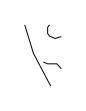

nose 5.2154746


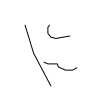

mouth 3.041874


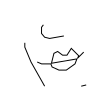

mouth 7.95773


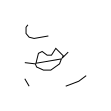

mouth 2.9909406


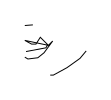

nose 3.4243445


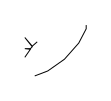

nose 2.8951726


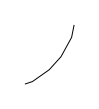

nose 7.9146934


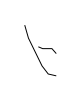

mouth 3.1944294


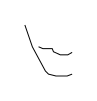

mouth 0.42660055


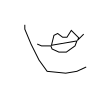

mouth 6.238993


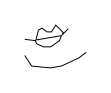

mouth 0.84791005


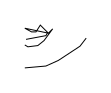

nose 3.0735188


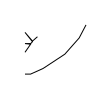

nose 1.8818642


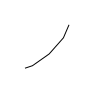

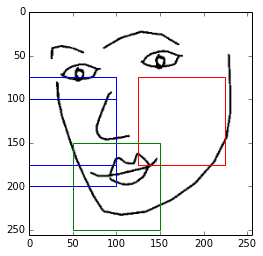

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 4.3325577


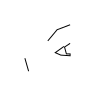

mouth 1.8662461


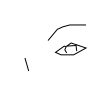

eye 0.49816006


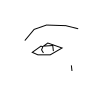

eye 2.1240826


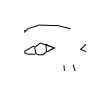

nose 2.8643851


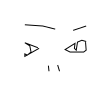

mouth 1.9388498


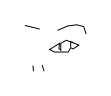

mouth 3.3472655


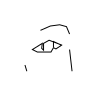

nose 3.2259989


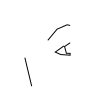

mouth 0.92612576


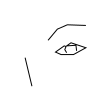

eye 1.4988444


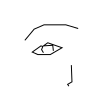

eye 1.5473397


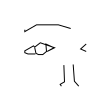

nose 1.858591


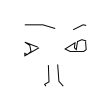

nose 1.5392269


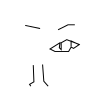

mouth 2.1374125


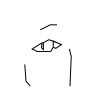

nose 6.67695


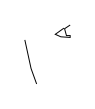

nose 1.3441324


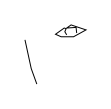

None 1.5983112


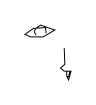

no classification
mouth 2.2820194


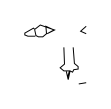

None 1.5245833


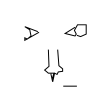

no classification
nose 3.08743


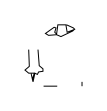

nose 2.0866432


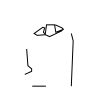

nose 6.015178


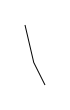

nose 4.075289


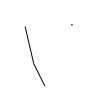

nose 4.9969096


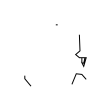

nose 0.87897396


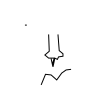

nose 2.622909


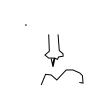

nose 2.3551455


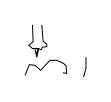

nose 10.42147


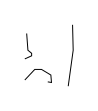

nose 9.370228


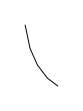

nose 9.370228


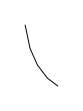

mouth 1.7440478


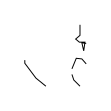

nose 1.5697107


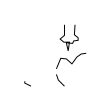

nose 1.5891465


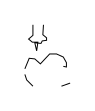

mouth 0.6121465


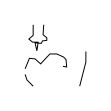

nose 3.9786916


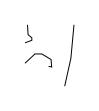

nose 8.590907


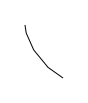

nose 10.585907


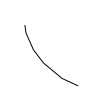

mouth 2.5164294


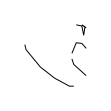

mouth 2.5466118


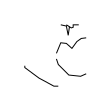

mouth 3.3137484


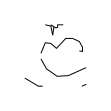

None -0.12326792


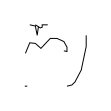

no classification
nose 3.2757478


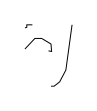

nose 5.783949


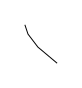

nose 8.084501


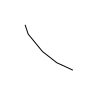

nose 4.2319403


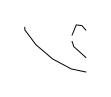

mouth 2.1576989


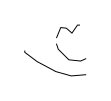

mouth 3.226538


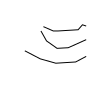

mouth 3.669912


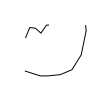

nose 2.7764392


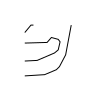

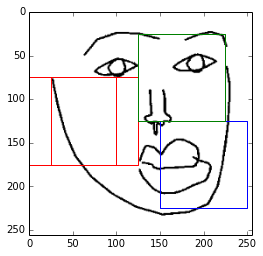

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 3.5110068


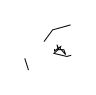

eye 2.5054939


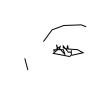

eye 4.9454975


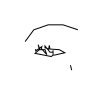

eye 1.8807986


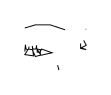

nose 1.7403381


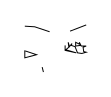

nose 2.030663


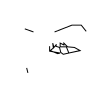

mouth 2.1671588


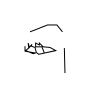

nose 1.4623781


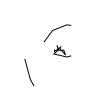

eye 0.72995394


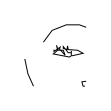

eye 4.460536


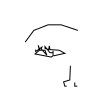

eye 2.0252647


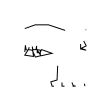

mouth 1.78136


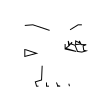

nose 2.5665236


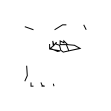

mouth 1.3997315


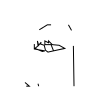

nose 2.9482589


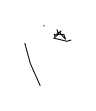

nose 1.0960408


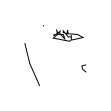

mouth 1.4255946


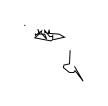

mouth 3.0337179


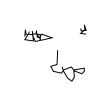

mouth 5.080951


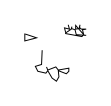

mouth 1.8983339


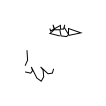

mouth 0.6576636


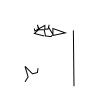

nose 5.9506307


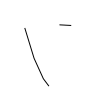

nose 8.599904


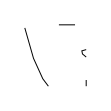

nose 6.314789


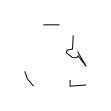

nose 1.8680843


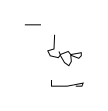

nose 3.5588708


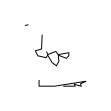

nose 2.2103367


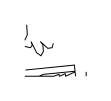

nose 6.245266


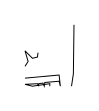

nose 8.395222


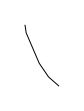

nose 10.124288


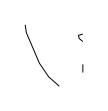

nose 2.8223004


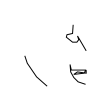

mouth 4.1951895


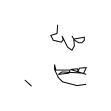

mouth 6.9126506


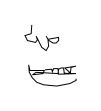

mouth 7.630382


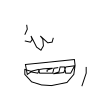

mouth 3.863233


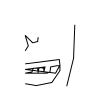

nose 6.777851


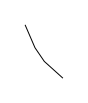

nose 11.91914


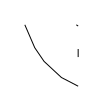

nose 3.046565


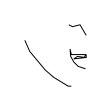

mouth 3.144103


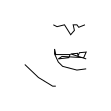

mouth 5.6980414


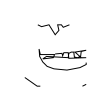

mouth 9.704199


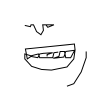

mouth 2.7925346


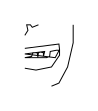

nose 3.911902


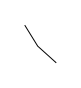

nose 8.489072


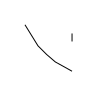

nose 4.8954563


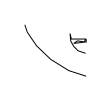

mouth 3.230146


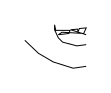

mouth 7.758806


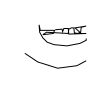

mouth 4.344005


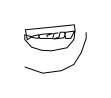

mouth 5.73441


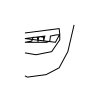

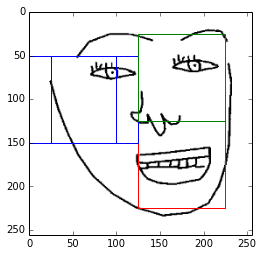

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
nose 4.799871


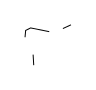

nose 5.049116


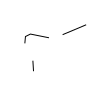

nose 1.312916


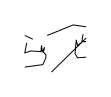

nose 3.103033


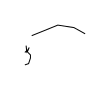

nose 3.6589403


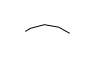

mouth 1.0554591


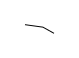

nose 7.6165867


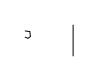

None 2.5466752


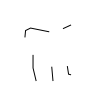

no classification
None 2.1441712


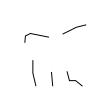

no classification
nose 2.2279367


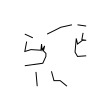

nose 3.575623


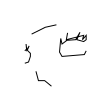

nose 2.905881


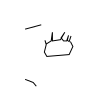

mouth 3.3736415


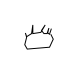

nose 7.146293


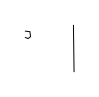

nose 7.6783924


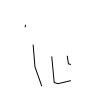

nose 7.8287024


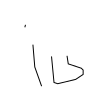

nose 4.243663


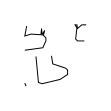

nose 5.7667756


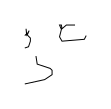

nose 2.39993


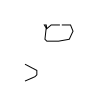

nose 3.093598


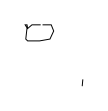

nose 6.382969


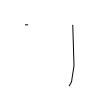

nose 6.3126307


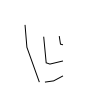

nose 4.0618453


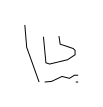

mouth 2.8836746


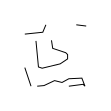

nose 4.467317


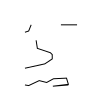

nose 4.2456827


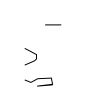

nose 4.6194797


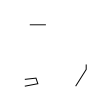

nose 5.749341


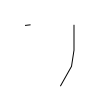

nose 5.3118606


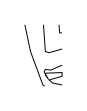

nose 2.8147178


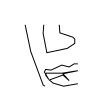

nose 2.4798322


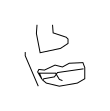

mouth 5.651457


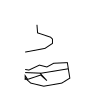

nose 6.4489756


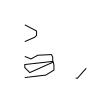

nose 5.1852784


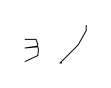

nose 4.5582137


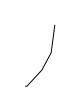

nose 3.3184633


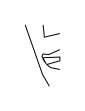

mouth 2.6358


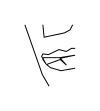

nose 2.5486069


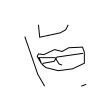

mouth 6.4006867


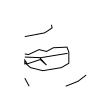

mouth 4.052666


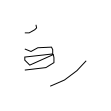

nose 4.4355636


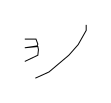

nose 2.9446583


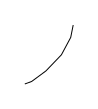

nose 4.4269285


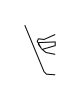

mouth 2.0925941


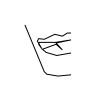

mouth 2.0144


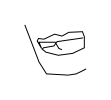

mouth 8.8163805


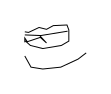

mouth 3.9478903


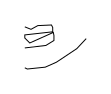

nose 2.092299


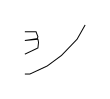

nose 1.8002726


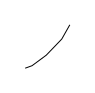

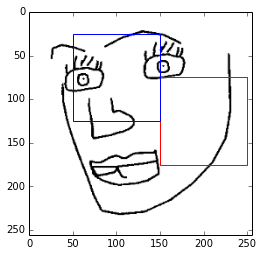

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
eye 0.06808424


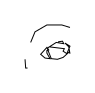

None 0.93318224


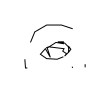

no classification
eye 2.0592508


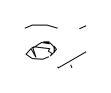

nose 2.784274


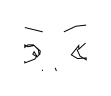

mouth 1.7898191


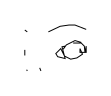

nose 2.2699237


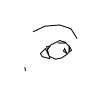

mouth 3.812953


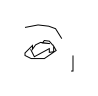

mouth 0.52157676


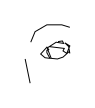

eye 1.1656437


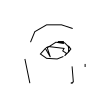

mouth 1.4203745


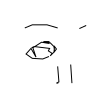

nose 1.820506


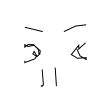

nose 1.3201065


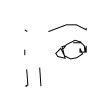

nose 1.1691107


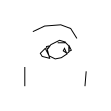

nose 1.79535


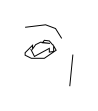

mouth 0.6279042


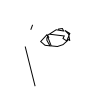

mouth 0.8863976


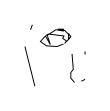

mouth 1.6052186


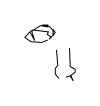

nose 1.2942146


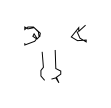

nose 2.8562403


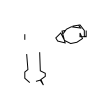

nose 3.442555


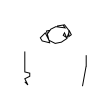

mouth 3.5646925


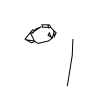

nose 2.6615925


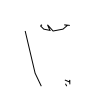

nose 1.5800518


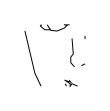

nose 3.2357898


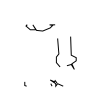

nose 4.6548157


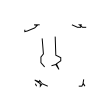

nose 4.4443264


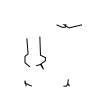

nose 4.6110625


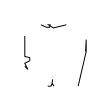

nose 5.2947965


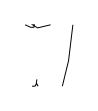

nose 9.049961


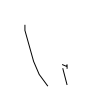

nose 4.786774


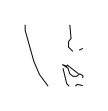

nose 2.67666


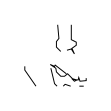

mouth 6.9495683


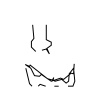

nose 2.8806438


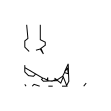

nose 8.149307


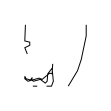

nose 6.900104


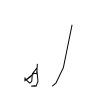

nose 8.678253


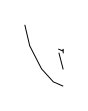

mouth 2.4092674


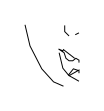

mouth 4.4213853


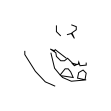

mouth 7.3390307


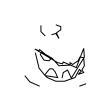

mouth 4.3914886


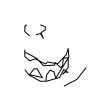

nose 5.8490953


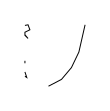

nose 6.4811034


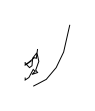

nose 7.3606386


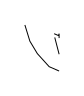

None 0.46577212


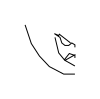

no classification
nose 1.4125483


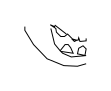

mouth 6.402194


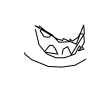

mouth 5.777864


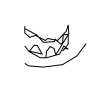

nose 8.80801


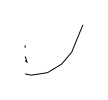

nose 5.391225


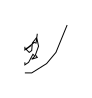

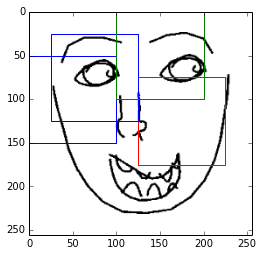

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model four_class_checkpoint/vector-110000.
INFO:tensorflow:Restoring parameters from four_class_checkpoint/vector-110000
eye 2.37597


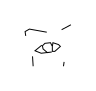

eye 2.096459


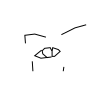

nose 4.237404


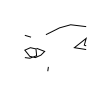

eye 3.7605863


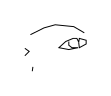

eye 0.10468459


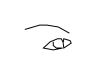

nose 1.1554306


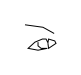

nose 5.349627


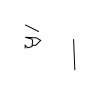

nose 1.4902164


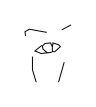

None 1.188471


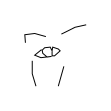

no classification
nose 3.6622033


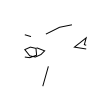

nose 1.0368552


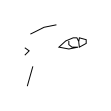

mouth 0.8499055


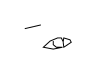

nose 0.91585565


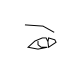

nose 5.2658143


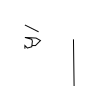

nose 1.6947914


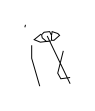

nose 3.002616


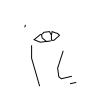

nose 2.9492664


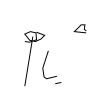

nose 5.636431


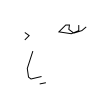

nose 2.998711


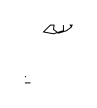

nose 2.7951078


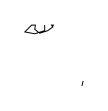

nose 7.8480554


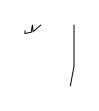

nose 3.7145667


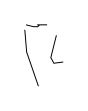

nose 1.3690414


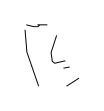

nose 3.5337768


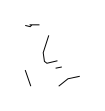

nose 11.025978


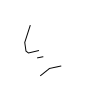

nose 9.647563


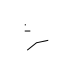

nose 1.9499401


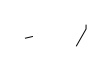

nose 4.3702397


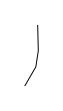

nose 6.670171


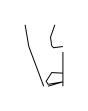

nose 7.8820367


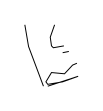

mouth 2.858158


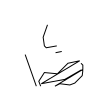

nose 5.1443334


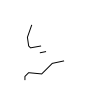

nose 9.421115


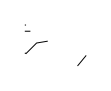

nose 2.755692


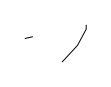

nose 4.4049673


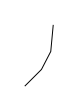

nose 4.7002115


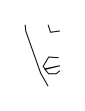

nose 4.8007207


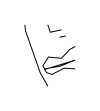

nose 4.6207786


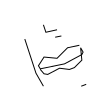

nose 4.4059176


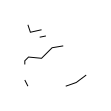

nose 8.019599


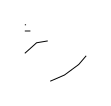

nose 3.7715917


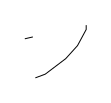

nose 2.9978476


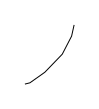

nose 7.5213046


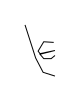

nose 5.674015


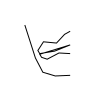

mouth 3.7104166


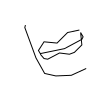

nose 7.7177157


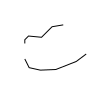

nose 2.3994112


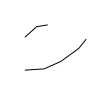

nose 5.4467573


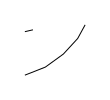

nose 2.0637445


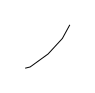

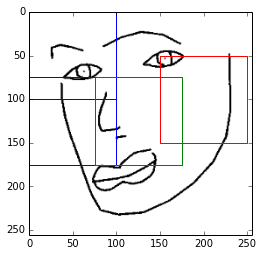

In [4]:
import classification
classification = reload(classification)
from classification import classify

# window parameters
window_size = 100
shift_size = 25

# scale the strokes
scale_factor = 8

# how many faces do you want to use?
num_faces = 10

for face in load_faces(n=num_faces):
    im = cv2.imread(face, 0)
    
    # documentation is in classification.py
    # thresh is minimum confidence
    # eyes, noses, mouths take the confident bounding boxes
    # verbose shows each window classification and accuracy
    classify(im,
             window_size=window_size,
             shift_size=shift_size,
             scale_factor=scale_factor,
             thresh=0.5,
             eyes=2, noses=1, mouths=1,
             verbose=True)
